In [2]:
#@title
!git clone https://github.com/facebookresearch/BenchMARL
#@title
%cd /content/BenchMARL
#@title
!pip install -U torch torchvision
!pip install -e .
#@title
!pip install dm-meltingpot
!apt-get update
!apt-get install -y x11-utils
!apt-get install -y xvfb
!apt-get install -y imagemagick
!pip install pyvirtualdisplay
!pip install id-marl-eval
!apt-get install python3-opengl
!pip install --upgrade chex
!pip install wandb
import pyvirtualdisplay
display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
display.start()

fatal: destination path 'BenchMARL' already exists and is not an empty directory.
/content/BenchMARL
Obtaining file:///content/BenchMARL
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for benchmarl (pyproject.toml) ... done
  Created wheel for benchmarl: filename=benchmarl-1.3.0-0.editable-py3-none-any.whl size=3755 sha256=582d7c9db44dcf074841b0ce92e7ce6471bac770f5d87d7de0bf100431723324
  Stored in directory: /tmp/pip-ephem-wheel-cache-xk_r7srw/wheels/5b/86/4d/eff20c27275b75bdf6b20e4a81af849509b0068ff4c44be9df
Successfully built benchmarl
  Attempting uninstall: benchmarl
    Found existing installation: benchmarl 1.3.0
    Uninstalling benchmarl-1.3.0:
      Successfully uninstalled benchmarl-1.3.0


  Using cached chex-0.1.7-py3-none-any.whl.metadata (17 kB)
Using cached chex-0.1.7-py3-none-any.whl (89 kB)
  Attempting uninstall: chex
    Found existing installation: chex 0.1.87
    Uninstalling chex-0.1.87:
      Successfully uninstalled chex-0.1.87
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
optax 0.2.4 requires chex>=0.1.87, but you have chex 0.1.7 which is incompatible.


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 257 kB in 2s (130 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package list

In [1]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: research-richard-staszkiewicz (research-richard-staszkiewicz-ibm). Use `wandb login --relogin` to force relogin


True

In [ ]:
from benchmarl.algorithms import IsacConfig, MasacConfig
from benchmarl.benchmark import Benchmark
from benchmarl.environments import MeltingPotTask
from benchmarl.experiment import ExperimentConfig
from benchmarl.models.mlp import MlpConfig
from benchmarl.models.cnn import CnnConfig

# Loads from "benchmarl/conf/experiment/base_experiment.yaml"
experiment_config = ExperimentConfig.get_from_yaml()

# Loads from "benchmarl/conf/task/meltingpot"
tasks = [MeltingPotTask.COLLABORATIVE_COOKING__CIRCUIT.get_from_yaml(),
         MeltingPotTask.CHICKEN_IN_THE_MATRIX__ARENA.get_from_yaml(),
         MeltingPotTask.CLEAN_UP.get_from_yaml()]

# Loads from "benchmarl/conf/algorithm"
algorithm_configs = [
    IsacConfig.get_from_yaml(),
    MasacConfig.get_from_yaml(),
]

# Loads from "benchmarl/conf/model/layers"
model_config = CnnConfig.get_from_yaml()
critic_model_config = CnnConfig.get_from_yaml()

experiment_config.max_n_iters = 2
experiment_config.loggers = ["wandb"]
experiment_config.train_device = "cuda"
experiment_config.sampling_device = "cpu"
experiment_config.project_name = "BenchMARL-ISACvsMASAC"

benchmark = Benchmark(
    algorithm_configs=algorithm_configs,
    tasks=tasks,
    seeds={0, 1},
    experiment_config=experiment_config,
    model_config=model_config,
    critic_model_config=critic_model_config,
)
benchmark.run_sequential()

/content/BenchMARL/benchmarl/environments/magent/common.py:44: DeprecationWarning: private variables, such as '_MAgentTask__get_env', will be normal attributes in 3.11
  def __get_env(self) -> EnvBase:
/content/BenchMARL/benchmarl/environments/common.py:36: UserWarning: TaskConfig python dataclass not foud, task is being loaded without type checks
  warnings.warn(


Created benchmark with 12 experiments.


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/usr/local/lib/python3.10/dist-packages/tensordict/nn/probabilistic.py:467: UserWarning: deterministic_sample wasn't found when queried on <class 'torch.distributions.categorical.Categorical'>. SafeProbabilisticModule is falling back on mode instead. For better code quality and efficiency, make sure to either provide a distribution with a deterministic_sample attribute or to change the InteractionMode to the desired value.
  warnings.warn(



Running experiment 1/12.



  0%|          | 0/2 [00:00<?, ?it/s]/content/BenchMARL/benchmarl/experiment/logger.py:100: UserWarning: No episode terminated this iteration and thus the episode rewards will be NaN, this is normal if your horizon is longer then one iteration. Learning is proceeding fine.The episodes will probably terminate in a future iteration.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """
/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: DeprecationWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
  from scipy.ndimage.filters import sobel

  if event.key is 'enter':

mean return = nan:  50%|█████     | 1/2 [04:21<04:21, 261.36s/it]

In [2]:
import os

# Specify the directory to search
directory_path = "./"  # Change this to your target directory

json_files = []
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith(".json"):
            json_files.append(os.path.join(root, file))
json_files

['./mappo_balance_mlp__0232c67c_24_12_01-11_10_22/mappo_balance_mlp__0232c67c_24_12_01-11_10_22.json',
 './qmix_balance_mlp__1d0e7054_24_12_01-11_18_21/qmix_balance_mlp__1d0e7054_24_12_01-11_18_21.json',
 './mappo_balance_mlp__9c469e55_24_12_01-11_12_09/mappo_balance_mlp__9c469e55_24_12_01-11_12_09.json',
 './mappo_sampling_mlp__e696467b_24_12_01-11_16_27/mappo_sampling_mlp__e696467b_24_12_01-11_16_27.json',
 './mappo_balance_mlp__a6238aa1_24_12_01-11_13_17/mappo_balance_mlp__a6238aa1_24_12_01-11_13_17.json',
 './qmix_sampling_mlp__965c8e05_24_12_01-11_22_25/qmix_sampling_mlp__965c8e05_24_12_01-11_22_25.json',
 './masac_sampling_mlp__d533df63_24_12_01-11_30_08/masac_sampling_mlp__d533df63_24_12_01-11_30_08.json',
 './mappo_sampling_mlp__c24f65e8_24_12_01-11_14_29/mappo_sampling_mlp__c24f65e8_24_12_01-11_14_29.json',
 './masac_sampling_mlp__c519dc2a_24_12_01-11_27_40/masac_sampling_mlp__c519dc2a_24_12_01-11_27_40.json',
 './masac_balance_mlp__35845a51_24_12_01-11_25_59/masac_balance_mlp

/content/BenchMARL/benchmarl/environments/magent/common.py:44: DeprecationWarning: private variables, such as '_MAgentTask__get_env', will be normal attributes in 3.11
  def __get_env(self) -> EnvBase:
/usr/local/lib/python3.10/dist-packages/colorcet/__init__.py:82: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  register_cmap("cet_"+name, cmap=cm[name])


The tabular results are stored in ./aggregated_score_return.csv and they are the following
                             MAPPO               QMIX              MASAC
Median          0.68 [0.64, 0.71]  0.97 [0.95, 0.99]  0.54 [0.52, 0.56]
IQM             0.71 [0.64, 0.71]  0.97 [0.95, 0.99]  0.54 [0.52, 0.56]
Mean            0.68 [0.64, 0.71]  0.97 [0.95, 0.99]  0.54 [0.52, 0.56]
Optimality Gap  0.32 [0.29, 0.36]  0.03 [0.01, 0.05]  0.46 [0.44, 0.48]
The latex tabular results are stored in ./aggregated_score_return_latex.txt


KeyError: 'navigation'

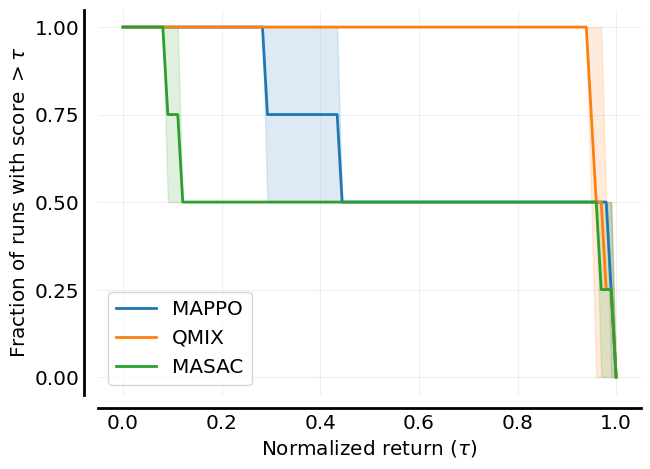

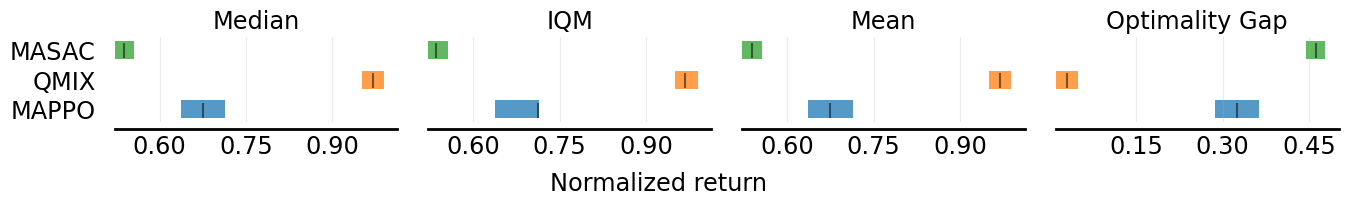

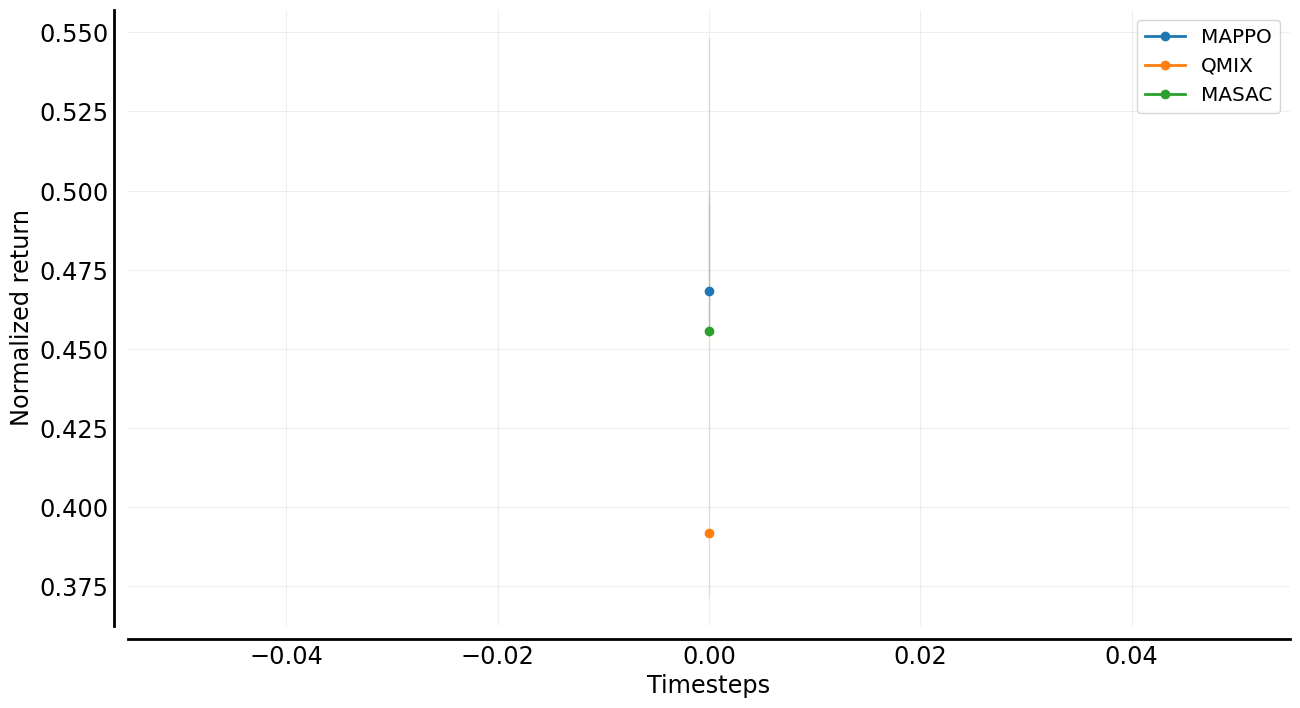

In [3]:
#  Copyright (c) Meta Platforms, Inc. and affiliates.
#
#  This source code is licensed under the license found in the
#  LICENSE file in the root directory of this source tree.
#

import os
from pathlib import Path
from typing import List

from benchmarl.eval_results import load_and_merge_json_dicts, Plotting

from matplotlib import pyplot as plt


def run_benchmark() -> List[str]:
    from benchmarl.algorithms import MappoConfig, QmixConfig
    from benchmarl.benchmark import Benchmark
    from benchmarl.environments import VmasTask
    from benchmarl.experiment import ExperimentConfig
    from benchmarl.models.mlp import MlpConfig

    # Configure experiment
    experiment_config = ExperimentConfig.get_from_yaml()
    experiment_config.save_folder = Path(os.path.dirname(os.path.realpath(__file__)))
    experiment_config.loggers = []
    experiment_config.max_n_iters = 100

    # Configure benchmark
    tasks = [VmasTask.NAVIGATION.get_from_yaml()]
    algorithm_configs = [
        MappoConfig.get_from_yaml(),
        QmixConfig.get_from_yaml(),
    ]
    model_config = MlpConfig.get_from_yaml()
    critic_model_config = MlpConfig.get_from_yaml()

    benchmark = Benchmark(
        algorithm_configs=algorithm_configs,
        tasks=tasks,
        seeds={0, 1},
        experiment_config=experiment_config,
        model_config=model_config,
        critic_model_config=critic_model_config,
    )

    # For each experiment, run it and get its output file name
    experiments = benchmark.get_experiments()
    experiments_json_files = []
    for experiment in experiments:
        exp_json_file = str(
            Path(experiment.folder_name) / Path(experiment.name + ".json")
        )
        experiments_json_files.append(exp_json_file)
        experiment.run()
    return experiments_json_files


if __name__ == "__main__":
    # Uncomment this to rerun the benchmark that generates the files
    # experiments_json_files = run_benchmark()
    experiments_json_files = json_files
    raw_dict = load_and_merge_json_dicts(experiments_json_files)

    # Load and process experiment outputs
    # raw_dict = load_and_merge_json_dicts(experiments_json_files)
    processed_data = Plotting.process_data(raw_dict)
    (
        environment_comparison_matrix,
        sample_efficiency_matrix,
    ) = Plotting.create_matrices(processed_data, env_name="vmas")

    # Plotting
    Plotting.performance_profile_figure(
        environment_comparison_matrix=environment_comparison_matrix
    )
    plt.savefig("performance.png")
    Plotting.aggregate_scores(
        environment_comparison_matrix=environment_comparison_matrix
    )
    plt.savefig("aggregare_scores.png")
    Plotting.environemnt_sample_efficiency_curves(
        sample_effeciency_matrix=sample_efficiency_matrix
    )
    plt.savefig("sample_efficiency.png")
    Plotting.task_sample_efficiency_curves(
        processed_data=processed_data, env="vmas", task="navigation"
    )
    plt.savefig("task_sample_efficiency.png")
    Plotting.probability_of_improvement(
        environment_comparison_matrix,
        algorithms_to_compare=[["qmix", "mappo"]],
    )
    plt.savefig("probability_of_improvement.png")
    plt.show()

In [4]:
from benchmarl.algorithms import MappoConfig
from benchmarl.environments import VmasTask
from benchmarl.experiment import Experiment, ExperimentConfig
from benchmarl.models.mlp import MlpConfig

# Loads from "benchmarl/conf/experiment/base_experiment.yaml"
experiment_config = ExperimentConfig.get_from_yaml()
# Loads from "benchmarl/conf/task/vmas/balance.yaml"
task = VmasTask.BALANCE.get_from_yaml()
# Loads from "benchmarl/conf/algorithm/mappo.yaml"
algorithm_config = MappoConfig.get_from_yaml()
# Loads from "benchmarl/conf/model/layers/mlp.yaml"
model_config = MlpConfig.get_from_yaml()
critic_model_config = MlpConfig.get_from_yaml()

experiment_config.max_n_iters = 2
experiment_config.loggers = []

experiment = Experiment(
    task=task,
    algorithm_config=algorithm_config,
    model_config=model_config,
    critic_model_config=critic_model_config,
    seed=0,
    config=experiment_config,
)
experiment.run()


mean return = -6.981141090393066: 100%|██████████| 2/2 [01:10<00:00, 35.26s/it]
